In [2]:
import pandas as pd
import matplotlib.pyplot as plt

ID_VARS = ['subject_id', 'model', 'experiment', 'shots', 'repetition', 'n_support', 'n_query']
EPOCHS = 10

In [3]:
df_csv = pd.read_csv('COMBINED_RESULTS.csv')

print(df_csv.columns)
print(df_csv.shape)
print(df_csv['model'].unique())

# df_all = pd.read_csv('all_results.csv')
# df_all.loc[df_all['model'] == 'labram', 'model'] = 'labram-lora'
# df_neki = pd.read_csv("last8.csv")
# df_neki.loc[df_neki['model'] == 'labram', 'model'] = 'labram-partialft'
# df_csv = pd.concat([df_neki, df_all], ignore_index=True, sort=False)

# print(df_csv.columns)
# print(df_csv.shape)
# print(df_csv['model'].unique())

Index(['subject_id', 'shots', 'repetition', 'final_accuracy', 'final_loss',
       'final_accuracy_train', 'n_samples', 'n_support', 'n_query',
       'acc_train_e1', 'acc_train_e2', 'acc_train_e3', 'acc_train_e4',
       'acc_train_e5', 'acc_train_e6', 'acc_train_e7', 'acc_train_e8',
       'acc_train_e9', 'acc_train_e10', 'acc_test_e1', 'acc_test_e2',
       'acc_test_e3', 'acc_test_e4', 'acc_test_e5', 'acc_test_e6',
       'acc_test_e7', 'acc_test_e8', 'acc_test_e9', 'acc_test_e10',
       'loss_supp_e1', 'loss_supp_e2', 'loss_supp_e3', 'loss_supp_e4',
       'loss_supp_e5', 'loss_supp_e6', 'loss_supp_e7', 'loss_supp_e8',
       'loss_supp_e9', 'loss_supp_e10', 'loss_q_e1', 'loss_q_e2', 'loss_q_e3',
       'loss_q_e4', 'loss_q_e5', 'loss_q_e6', 'loss_q_e7', 'loss_q_e8',
       'loss_q_e9', 'loss_q_e10', 'epoch_time_e1', 'epoch_time_e2',
       'epoch_time_e3', 'epoch_time_e4', 'epoch_time_e5', 'epoch_time_e6',
       'epoch_time_e7', 'epoch_time_e8', 'epoch_time_e9', 'epoch_time_e10

In [4]:
# metric: split
# accuracy: train 
df_train = df_csv.melt(
    id_vars=ID_VARS,
    value_vars=[f'acc_train_e{i}' for i in range(1, EPOCHS+1)],
    var_name='epoch',
    value_name='value'
)
df_train['split'] = 'train'
df_train['metric'] = 'accuracy'

# accuracy: test 
df_test = df_csv.melt(
    id_vars=ID_VARS,
    value_vars=[f'acc_test_e{i}' for i in range(1, EPOCHS+1)],
    var_name='epoch',
    value_name='value'
)
df_test['split'] = 'test'
df_test['metric'] = 'accuracy'

# loss: support 
df_supp = df_csv.melt(
    id_vars=ID_VARS,
    value_vars=[f'loss_supp_e{i}' for i in range(1, EPOCHS+1)],
    var_name='epoch',
    value_name='value'
)
df_supp['split'] = 'support'
df_supp['metric'] = 'loss'

# loss: query 
df_query = df_csv.melt(
    id_vars=ID_VARS,
    value_vars=[f'loss_q_e{i}' for i in range(1, EPOCHS+1)],
    var_name='epoch',
    value_name='value'
)
df_query['split'] = 'query'
df_query['metric'] = 'loss'

# combine
df_long = pd.concat([df_train, df_test, df_supp, df_query], ignore_index=True)
# clean epoch
df_long['epoch'] = df_long['epoch'].str.extract(r'e(\d+)').astype(int)

# reorder
df = df_long[ID_VARS + ['epoch', 'split', 'metric', 'value']].sort_values(ID_VARS + ['metric','split','epoch']).reset_index(drop=True)

print(f"Shape: {df.shape}")

print("Unique values:")
for col in ID_VARS:
    unique_vals = df[col].unique()
    n_unique = len(unique_vals)
    preview = ", ".join(map(str, unique_vals[:10]))
    print(f"  {col:<12}: {n_unique:>3} unique --> {preview}")
print(f"Splits: {df['split'].unique().tolist()}")
print(f"Metrics: {df['metric'].unique().tolist()}")
print(df.columns)
print(df.head())

Shape: (2880, 11)
Unique values:
  subject_id  :   6 unique --> 1, 2, 3, 4, 5, 6
  model       :   3 unique --> deepconvnet, labram-lora, labram-partialft
  experiment  :  18 unique --> deepconvnet_fold001_subj1, labram-lora_fold001_subj1, labram-partialft_fold001_subj1, deepconvnet_fold002_subj2, labram-lora_fold002_subj2, labram-partialft_fold002_subj2, deepconvnet_fold003_subj3, labram-lora_fold003_subj3, labram-partialft_fold003_subj3, deepconvnet_fold004_subj4
  shots       :   4 unique --> 0, 2, 4, 8
  repetition  :   1 unique --> 0
  n_support   :   4 unique --> 0, 2, 4, 8
  n_query     :   4 unique --> 400, 398, 396, 392
Splits: ['test', 'train', 'query', 'support']
Metrics: ['accuracy', 'loss']
Index(['subject_id', 'model', 'experiment', 'shots', 'repetition', 'n_support',
       'n_query', 'epoch', 'split', 'metric', 'value'],
      dtype='object')
   subject_id        model                 experiment  shots  repetition  \
0           1  deepconvnet  deepconvnet_fold001_subj1

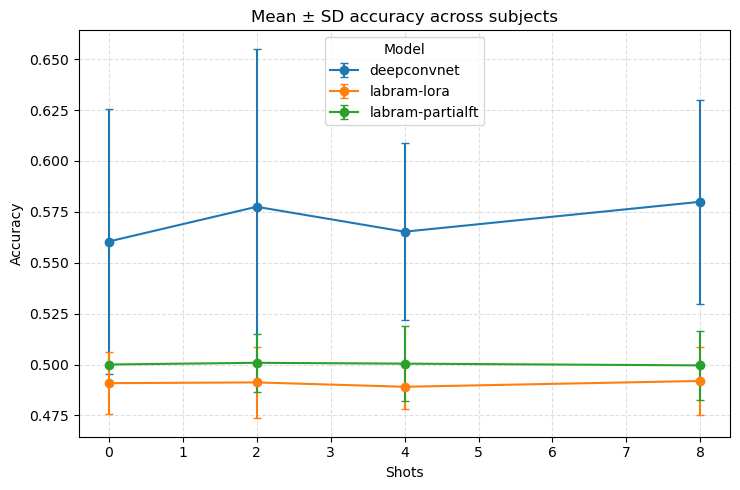

In [ ]:
rules = {
    "deepconvnet": {0: 1, 1: 1, 2: 1, 3: 2, 4: 2, 5: 13, 6: 15, 7: 13, 8: 15, 9: 14, 10: 12, 25: 15},
    "labram-lora": {0: 1, 1: 5, 2: 7, 3: 8, 4: 10, 5: 12, 6: 14, 7: 15, 8: 17, 9: 20, 10: 20, 25: 20},
    "labram-partialft": {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 25: 20},
}


#  *2 because we are balancing per class !
lookup = {(m, s*2): e for m, d in rules.items() for s, e in d.items()}

df_acc = df[(df['split'] == 'test') & (df['metric'] == 'accuracy')].copy()


df_acc["target_epoch"] = [lookup.get((m, s)) for m, s in zip(df_acc["model"], df_acc["shots"])]
df_rule = df_acc[df_acc["epoch"].eq(df_acc["target_epoch"])].drop(columns="target_epoch")

per_subj = df_rule.groupby(["subject_id", "model", "shots"], as_index=False)["value"].mean()

df_selected = (
    per_subj.groupby(["shots", "model"])["value"]
            .agg(mean="mean", std="std", n="count")
            .reset_index()
            .sort_values(["model", "shots"])
)

plt.figure(figsize=(7.5, 5.0))
for model, g in df_selected.groupby("model"):
    g = g.sort_values("shots")
    plt.errorbar(g["shots"], g["mean"], yerr=g["std"], label=model, capsize=3, marker="o")
plt.xlabel("Shots")
plt.ylabel("Accuracy")
plt.title("Mean ± SD accuracy across subjects")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="Model")
plt.tight_layout()
plt.show()
